In [1]:
import pandas as pd
import numpy as np
import os
import glob
import cv2
import tifffile as tifi
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import shutil

In [2]:
%cd /Volumes/SEB_USB/Andrea_Thermal_2020/Manual/

/Volumes/SEB_USB/Andrea_Thermal_2020/Manual


In [3]:
selected_lines = pd.read_csv('selected_lines.csv')
selected_lines['plot'] = selected_lines['plot'].astype(str).str.zfill(4)

selected_lines['range'] = selected_lines['plot'].str[0:2]
selected_lines['column'] = selected_lines['plot'].str[2:]

In [4]:
selected_lines[selected_lines['genotype'] == 'PI_678337']

,genotype,plot,range,column
72,PI_678337,1604,16,04
74,PI_678337,1621,16,21
150,PI_678337,4213,42,13
166,PI_678337,4606,46,06


## Removing non-selected files from image directories

In [5]:
selected_lines_list = selected_lines['plot'].to_list()

In [6]:
path = 'plotclip/FLIR-2020-09-11__23-00-48-992-plotclip/plotclip_out/'

In [7]:
#Removes all of the directories not in the list specified

for filename in os.listdir(path):
    #If file is not present in list
    if filename not in selected_lines_list:
        #Get full path of file and remove it
        full_file_path = os.path.join(path, f'{filename}/')
        #shutil.rmtree(full_file_path)

## Only Selecting images of 5 genotypes of interested within the 26

In [8]:
## grabs all of the plots with the accession numbers in the list
goi_accession = ['PI_677994', 'PI_678025', 'PI_678122', 'PI_678337']
goi_plot = selected_lines[selected_lines['genotype'].isin(goi_accession)]

In [9]:
## Creates a list of unique range numbers of all experimental goi
range_list = goi_plot['range'].unique().tolist()
## Goes back to main file and grabs all of the plots with that particular range (this would include all experimental and the border plots in the same range)
selected_lines_border = selected_lines[selected_lines['range'].isin(range_list)]
## list of plots with border
plot_list = selected_lines_border['plot'].to_list()

## Grabbing plot clip images of plots of interest (for one date)

In [10]:
path = 'plotclip/FLIR-2020-08-14__12-28-13-122-plotclip/plotclip_out/'
path_list = []

for file in os.listdir(path):
    if file in plot_list:
        wanted_file_path = os.path.join(path, f'{file}/')
        path_list.append(wanted_file_path)
        path_list.sort()

## Thermal False Coloring

In [11]:
def search_list(POI, path_list):
    path_df = pd.DataFrame(path_list, columns = ['path'])
    path_df['plot'] = path_df['path'].str[-5:-1]
    path_oi = path_df[path_df['plot'].isin([POI])]
    return path_oi

In [12]:
#search_list('0301', path_list)

## Manually Pulling Specific PI Accessions

In [13]:
def figure(tif_img, plot):
    plt.imshow(tif_img, cmap = 'coolwarm')
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.title(f'{plot}')

## For 4 Plots

In [14]:
## For 4 Total Plots
def get_thermal(date, plot1, plot2, plot3, plot4):
    tif_img1 = tifi.imread(f'plotclip/FLIR-{date}__1*/plotclip_out/{plot1}/{plot1}_ortho.tif')
    
    tif_img2 = tifi.imread(f'plotclip/FLIR-{date}__1*/plotclip_out/{plot2}/{plot2}_ortho.tif')
    
    tif_img3 = tifi.imread(f'plotclip/FLIR-{date}__1*/plotclip_out/{plot3}/{plot3}_ortho.tif')
    
    tif_img4 = tifi.imread(f'plotclip/FLIR-{date}__1*/plotclip_out/{plot4}/{plot4}_ortho.tif')
    
    fig = plt.figure(figsize=(10, 7))
    fig.text(0.45, 1.0, f'{date}', fontsize=16)
    fig.text(0.30, 0.94, 'WW', fontsize=16)
    fig.text(0.70, 0.94, 'WL', fontsize=16)
    
    rows = 1
    columns = 4
    
    fig.add_subplot(rows, columns, 1)
    figure(tif_img1, plot1)
    
    fig.add_subplot(rows, columns, 2)
    figure(tif_img2, plot2)
    
    fig.add_subplot(rows, columns, 3)
    figure(tif_img3, plot3)
    
    fig.add_subplot(rows, columns, 4)
    figure(tif_img4, plot4)

In [15]:
# tif_img = tifi.imread(f'plotclip/FLIR-{date}__1*/plotclip_out/{plot1}/{plot1}_ortho.tif')
# tif_img = tif_img[~np.isnan(tif_img)]
# tif_img = tif_img[~pd.isnull(tif_img)]
# plt.imshow(tif_img, cmap = 'coolwarm')

## For 2 Plots

In [16]:
# ## For 2 Total Plots
# def get_thermal(date, plot1, plot2):
#     tif_img1 = tifi.imread(f'plotclip/FLIR-{date}__1*/plotclip_out/{plot1}/{plot1}_ortho.tif')

#     tif_img2 = tifi.imread(f'plotclip/FLIR-{date}__1*/plotclip_out/{plot2}/{plot2}_ortho.tif')

    
#     fig = plt.figure(figsize=(4, 7))
#     fig.text(0.35, 1.0, f'{date}', fontsize=16)
#     fig.text(0.25, 0.94, 'WW', fontsize=16)
#     fig.text(0.68, 0.94, 'WL', fontsize=16)
    
#     rows = 1
#     columns = 2
    
#     fig.add_subplot(rows, columns, 1)
#     figure(tif_img1, plot1)
    
#     fig.add_subplot(rows, columns, 2)
#     figure(tif_img2, plot2)

In [43]:
accession = 'PI_677985'

accession_plots = selected_lines[selected_lines['genotype'] == accession]['plot'].to_list()
accession_plots

plot1 = accession_plots[0]
plot2 = accession_plots[1]
plot3 = accession_plots[2]
plot4 = accession_plots[3]

In [44]:
date1 = '2020-07-28'
date2 = '2020-07-31'
date3 = '2020-08-04'
date4 = '2020-08-07'
date5 = '2020-08-11'
date6 = '2020-08-14'
date7 = '2020-08-18'
date8 = '2020-08-21'
date9 = '2020-08-28'
date10 = '2020-09-01'
date11 = '2020-09-04'
date12 = '2020-09-11'
date13 = '2020-09-15'

In [45]:
# ## For 2 plots
# # fig = plt.figure(figsize=(4, 7))


# # rows = 3
# # columns = 1

# # fig.add_subplot(rows, columns, 1)
# get_thermal(date1, plot1, plot2)
# plt.savefig(f'{date1}')
# # fig.add_subplot(rows, columns, 2)
# get_thermal(date2, plot1, plot2)
# plt.savefig(f'{date2}')

# # fig.add_subplot(rows, columns, 3)
# get_thermal(date3, plot1, plot2)
# plt.savefig(f'{date3}')

# # fig.add_subplot(rows, columns, 4)
# get_thermal(date4, plot1, plot2)
# plt.savefig(f'{date4}')

# # fig.add_subplot(rows, columns, 5)
# get_thermal(date5, plot1, plot2)
# plt.savefig(f'{date5}')

# # fig.add_subplot(rows, columns, 6)
# get_thermal(date6, plot1, plot2)
# plt.savefig(f'{date6}')

# # fig.add_subplot(rows, columns, 7)
# get_thermal(date7, plot1, plot2)
# plt.savefig(f'{date7}')

# # fig.add_subplot(rows, columns, 1)
# get_thermal(date8, plot1, plot2)
# plt.savefig(f'{date8}')

# # fig.add_subplot(rows, columns, 9)
# get_thermal(date9, plot1, plot2)
# plt.savefig(f'{date9}')

# # fig.add_subplot(rows, columns, 10)
# get_thermal(date10, plot1, plot2)
# plt.savefig(f'{date10}')

# # fig.add_subplot(rows, columns, 2)
# get_thermal(date11, plot1, plot2)
# plt.savefig(f'{date11}')

# # fig.add_subplot(rows, columns, 12)
# get_thermal(date12, plot1, plot2)
# plt.savefig(f'{date12}')

# # fig.add_subplot(rows, columns, 3)
# get_thermal(date13, plot1, plot2)
# plt.savefig(f'{date13}')

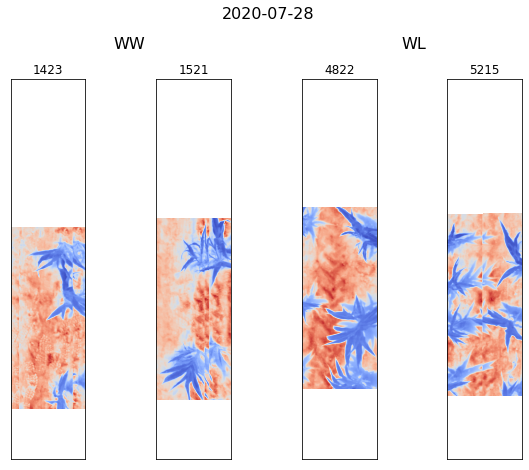

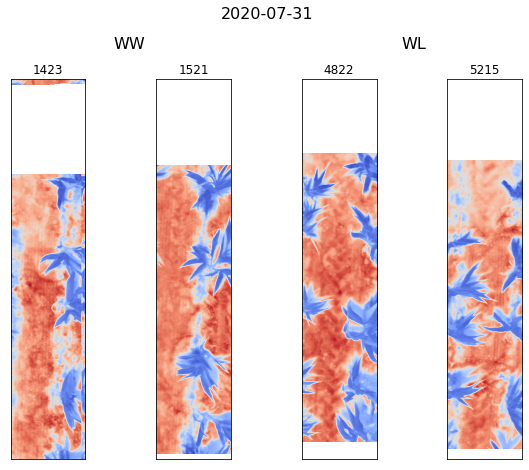

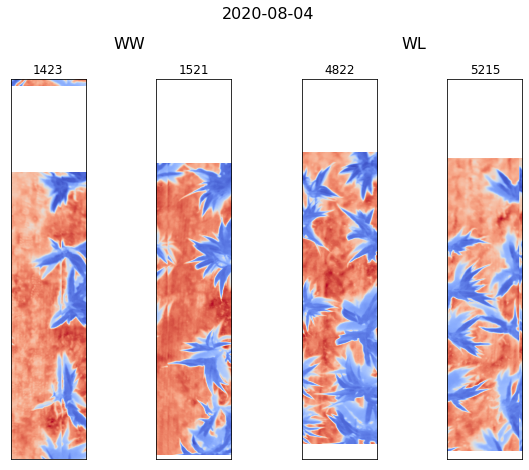

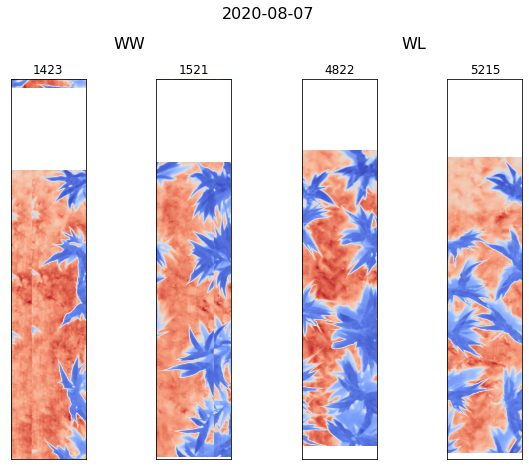

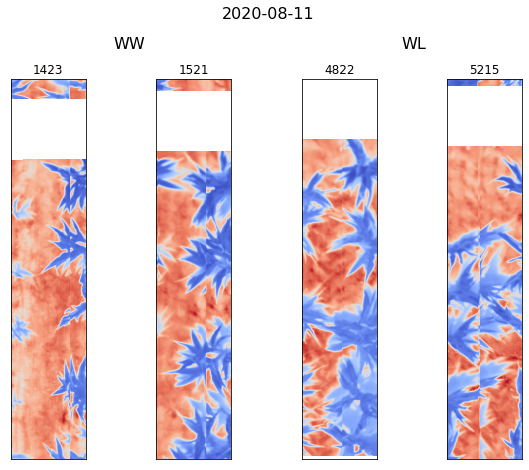

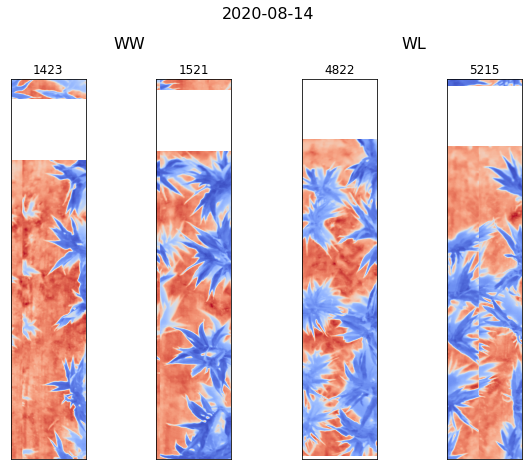

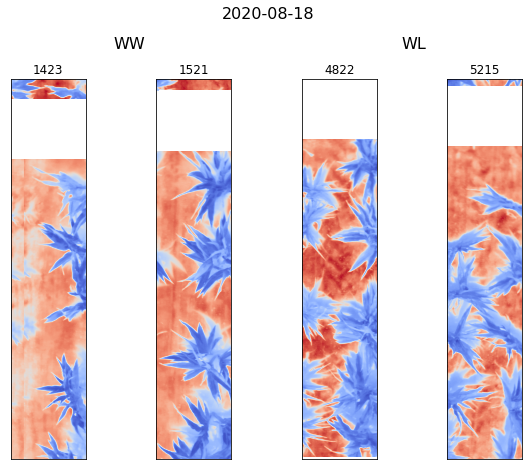

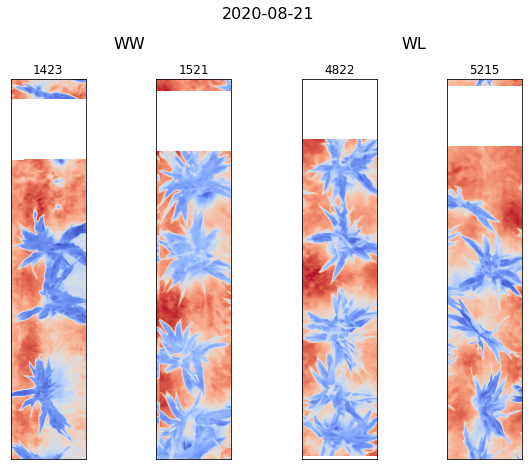

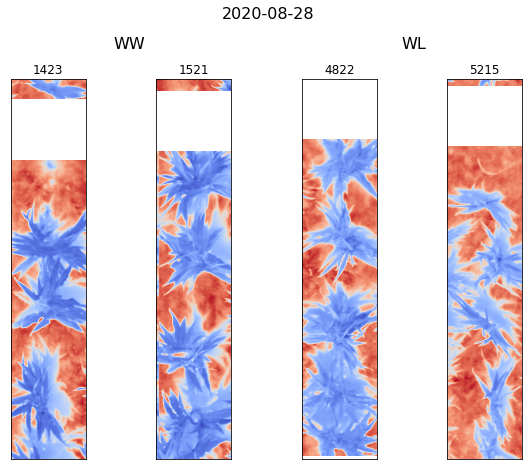

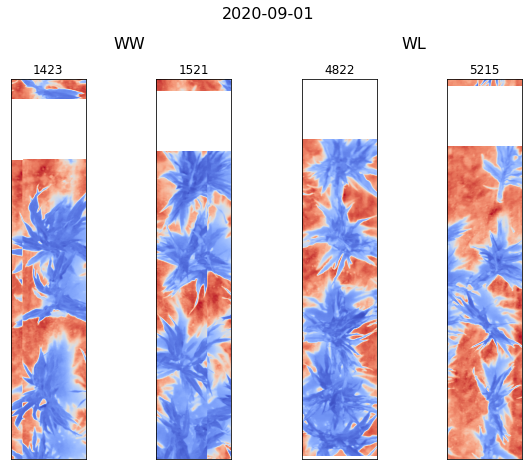

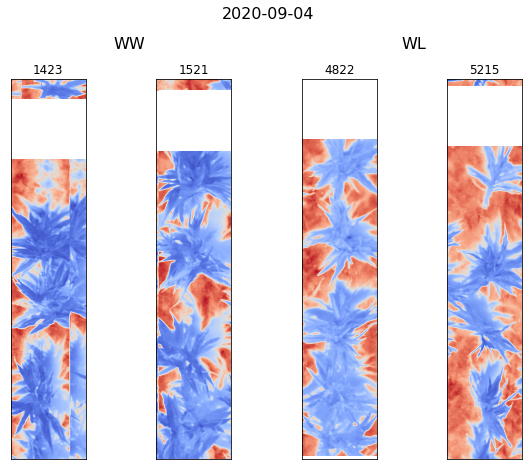

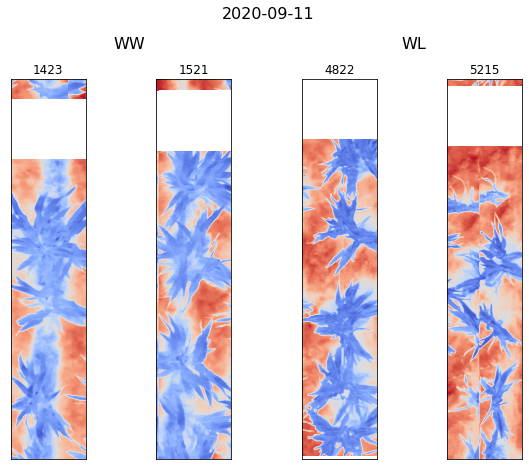

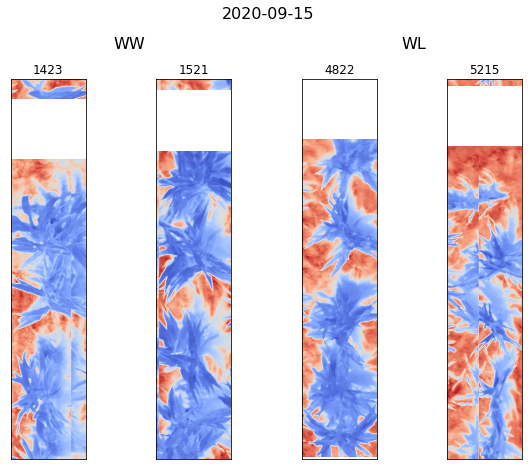

In [46]:
# ## For 4 plots
get_thermal(date1, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date1}')

get_thermal(date2, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date2}')

get_thermal(date3, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date3}')

get_thermal(date4, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date4}')

get_thermal(date5, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date5}')

get_thermal(date6, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date6}')

get_thermal(date7, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date7}')

get_thermal(date8, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date8}')

get_thermal(date9, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date9}')

get_thermal(date10, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date10}')

get_thermal(date11, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date11}')

get_thermal(date12, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date12}')

get_thermal(date13, plot1, plot2, plot3, plot4)
# plt.savefig(f'{date13}')

## Loading Thermal Data from Gantry

In [3]:
data = pd.read_csv('Season_11_Thermal_Data.csv')

In [4]:
del data['Unnamed: 0']

In [5]:
data['scan'] = None
for i, row in data.iterrows():
    filename = row['filename']
    digit = pd.to_numeric(filename[12])
    if digit > 1:
        data.at[i, 'scan'] = 'Night'
    else:
        data.at[i, 'scan'] = 'Day'

In [6]:
day_data = data[data['scan'] == 'Day']

## Trying to create a GIF Normalized_Corrected

-6.885579493437888 33.47036163192355


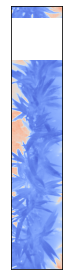

In [12]:
import imageio

accession = 'BTx_623'
plot = '0701'

path = f'/Volumes/SEB_USB/Andrea_Thermal_2020/Manual/GIF_thermal/{accession}/{plot}/'
outdir = f'{plot}_png'
image_list = []

## Including Thermal Data to create CTD TIFs
plot_data = day_data[day_data['plot'] == pd.to_numeric(plot)]

image_dict = {}
cnt = 0
for file in os.listdir(path):
    cnt += 1
    name = file[0:-4]
    date = file[0:10]
    
    ## Grabbing from Data
    plot_date = plot_data[plot_data['date'] == date]
    atm_temp = plot_date['atm_temp']
    ## Back to image
    wanted_file_path = os.path.join(path, f'{file}/')
    image_list.append(wanted_file_path)
    
    tif_img = tifi.imread(wanted_file_path)
    
    if atm_temp.shape[0] == 1:
        tif_img_ctd = tif_img - atm_temp.values
    else:
        tif_img_ctd = tif_img - plot_data['atm_temp'].mean()
    
    ## Getting min and max temps for normalization
    nan_tif_img = tif_img_ctd[~np.isnan(tif_img)]
    min_temp = min(nan_tif_img)
    max_temp = max(nan_tif_img)
    
    ## Creates dictionary of all tif image information
    image_dict[cnt] = {
    "tif_img": tif_img_ctd,
    "name": name,
    "date": date,
    "wanted_file_path": wanted_file_path,
    "min_temp": min_temp,
    "max_temp": max_temp,
}
    
image_df = pd.DataFrame.from_dict(image_dict,
    orient="index",
    columns=["tif_img", "name", "date", "wanted_file_path", "min_temp", "max_temp"])

## Gets rid of any extreme values
for i, row in image_df.iterrows():
    if row['min_temp'] < -100:
        image_df = image_df.drop(i)
    if row['max_temp'] > 100:
        image_df = image_df.drop(i)

min_temp_all = image_df['min_temp'].min()
max_temp_all = image_df['max_temp'].max()
print(min_temp_all, max_temp_all)
## Create another for loop for the image rendering and saving as png
for i, row in image_df.iterrows():
    tif_img = row['tif_img']
    df_name = row['name']
    date = row['date']
    plt.imshow(tif_img, cmap = 'coolwarm', vmin=min_temp_all, vmax=max_temp_all)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    
#     ## Adding Accession to Title and Date to the Bottom
#     #plt.annotate(f'{date}', xy=(-0.3, -0.06), xycoords='axes fraction', fontsize = 12)
#     #plt.title(f'{accession}')
    
    plt.tight_layout()
    plt.savefig(os.path.join(f'{df_name}.png'), bbox_inches='tight', dpi = 300)

In [17]:
plot = '4222'
# path = f'/Volumes/SEB_USB/Andrea_Thermal_2020/Manual/PNGs_update/{plot}/'
path = f'/Volumes/SEB_USB/Andrea_Thermal_2020/Manual/PNGs_Normalized_Corrected_CTD/{plot}_Normalized_Corrected_CTD/'

image_list = []
for file in os.listdir(path):
    name = file[0:-4]
    wanted_file_path = os.path.join(path, f'{file}/')
    image_list.append(wanted_file_path)
    image_list.sort()
    
images = list(map(lambda file: imageio.imread(file), image_list))
imageio.mimsave(os.path.join(f'{plot}.gif'), images, duration = 0.3)